<a href="https://colab.research.google.com/github/Banafshehkh/ComputerVision/blob/main/DL4Vision_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob

import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from torch.utils.data import Dataset
np.set_printoptions(6)
import cv2
from torchvision import datasets, transforms

# Dataset

For this assignment, we will use the Flowers Dataset from [Harvard Dataverse](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/1ECTVN#). The dataset is in the public domain, and therefore, we can use it for our work with no restrictions. For convenience, you can download the dataset from D2L. First, download the dataset Zip file from the D2L, upload it to the GoogleColab and unzip it using the following command.



In [ ]:
from google.colab import files
uploaded = files.upload()
! unzip -qq FlowerData.zip 

Saving FlowerData.zip to FlowerData.zip


### 1. Complete the **FlowerDataset** class. There are TODOs that need to be completed. (20 points)


In [ ]:
class FlowerDataset(Dataset):
  def __init__(self, root, transform=None, ext='.jpg'):
    """ Instantiate an object of the FlowerDataset
    Args:
      root (str): The root directory includes images, where each class of images is
        inside a separate folder.
      transformation (callable): A image augmentation function to be applied to an image.
        default is None, indicating the there will be no transformation applied
        an image. 
    """
    self.paths = []
    self.labels = []
    self.transform = transform
    self.label_encoder = {"daisy": 0, "dandelion": 1, "roses": 2,
                          "sunflowers": 3, "tulips": 4}
    for label, name in self.label_encoder.items():
        flower_folder = os.path.join(root, label)
        files = glob.glob(f'/content/FlowerData/{flower_folder}/*.jpg', recursive=True)
        self.paths += files
        self.labels += [name] * len(files)

    assert len(self.paths) == len(self.labels), "Number of image paths and labels should be equal"
    

  def __len__(self):
    """ Return the number of samples within the dataset """
    return len(self.paths)

  def __getitem__(self, i):
    """ This method return a tuple made of the i-th element of the dataset, i.e. (image, label).
    
    If the transofrm is not None, you should apply the transform function to the image."""
    image = cv2.imread(self.paths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if self.transform:
      augmented = self.transform(image = image)
      image = augmented['image']
    label = self.labels[i]
    return image, label

In [ ]:
data = FlowerDataset("train", transform = None)
data.__len__()
data.__getitem__(12)


(array([[[ 20,  10,   8],
         [ 26,  16,  14],
         [ 30,  20,  18],
         ...,
         [ 13,  15,   4],
         [ 12,  13,   5],
         [ 12,  13,   7]],
 
        [[ 20,  12,   9],
         [ 24,  16,  13],
         [ 28,  18,  16],
         ...,
         [ 12,  13,   7],
         [ 15,  16,  10],
         [ 17,  17,  15]],
 
        [[ 18,  13,   9],
         [ 20,  15,  11],
         [ 21,  16,  12],
         ...,
         [ 14,  15,  10],
         [ 14,  14,  12],
         [ 11,  11,  11]],
 
        ...,
 
        [[173, 188, 193],
         [177, 194, 186],
         [163, 177, 180],
         ...,
         [ 83,  99, 122],
         [ 82, 100, 100],
         [ 84, 106,  85]],
 
        [[175, 193, 203],
         [173, 192, 188],
         [154, 172, 176],
         ...,
         [ 88, 110,  97],
         [106, 122, 119],
         [111, 125, 134]],
 
        [[185, 204, 218],
         [172, 194, 192],
         [150, 171, 176],
         ...,
         [ 97, 117, 105],
  

###2. The uploaded file contains 3 folders: *train*, *validation*, and *test*. using data from the *validation* and *test* folder create `validation_dataset` and `test_dataset` such that there is no transformation applied to `validation_dataset`, and `test_dataset`. (10 points)

In [ ]:
# TODO: replace None with proper code
# transform = transforms.Compose([transforms.ToTensor()])
validation_dataset = FlowerDataset(root='validation', transform=None)
test_dataset = FlowerDataset(root='test', transform=None)


In [ ]:
print(test_dataset)

In [ ]:
x = test_dataset[0]
type(x)

tuple

### 3. Plot the first image of the `validation_dataset`, and `test_dataset`. The label of the image should be the title for the plot. (10 points)

The first image of validation dataset is:


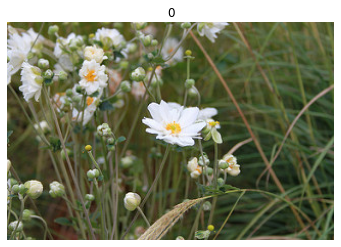

The first image of validation dataset is:


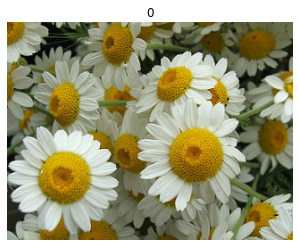

In [ ]:
#TODO: Add the code here
import matplotlib.pyplot as plt

def plot_image(image, label, label_encoder):
    title = [k for k, v in label_encoder.items() if v == label]
    title = [k for k in label_encoder.values() if k == label]

    title = title[0] if title else "Unknown"
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
print("The first image of validation dataset is:")
plot_image(*validation_dataset[0], validation_dataset.label_encoder)
print("The first image of validation dataset is:")
plot_image(*test_dataset[0], test_dataset.label_encoder)

#### 4. (A) Define a comprehensive pipeline designed to increase data variability. You should compose a pipeline including at least 10 image transformations from the `Albumentations` package or from `torchvision.transforms`.  (10 points)

#### (B) Using data from the train folder create `train_dataset`. The `train_dataset` should use the tranformation defined in part (A).  (5 points)

#### (C) Explain how the probabilities for applying each transformation affect the variability of images generated through `__getitem__` method of the `train_dataset`.  (5 points)

#### (D) Visualize the first image of the `train_dataset` for 10 times and observe the varibilities resulted from applying the used transformation. Describe your observation. Can you distingoush the flower types of these transformed images. If not what would you do about it.  (5 points)


In [ ]:
# (A)
import torchvision.transforms as T
import random

import albumentations as albu

train_transform = albu.Compose([
    albu.RandomRotate90(p=0.5),
    albu.Transpose(p=0.5),
    albu.Flip(p=0.5),
    albu.OneOf([
        albu.IAAAdditiveGaussianNoise(),
        albu.GaussNoise(),
    ], p=0.5),
    albu.Cutout(num_holes=1, max_h_size=16, max_w_size=16, p=0.5),
    albu.OneOf([
        albu.MotionBlur(p=0.2),
        albu.MedianBlur(blur_limit=3, p=0.1),
        albu.Blur(blur_limit=3, p=0.1),
    ], p=0.5),
    albu.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=45, p=0.5),
    albu.OneOf([
        albu.OpticalDistortion(distort_limit=2, shift_limit=0.5),
        albu.GridDistortion(num_steps=5, distort_limit=0.3),
    ], p=0.5),
    albu.Resize(224, 224),
    albu.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
    
])




/usr/local/lib/python3.8/dist-packages/albumentations/imgaug/transforms.py:263: FutureWarning: IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead
  warnings.warn("IAAAdditiveGaussianNoise is deprecated. Please use GaussNoise instead", FutureWarning)
/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


In [ ]:
# (B) TODO: Using data from the train folder create train_dataset. The train_dataset
#       should use the defined tranformation, i.e. train_transoform to augment
#       each image.
import torch
from torchvision import datasets
train_dataset = FlowerDataset(root='train', transform=train_transform)
# train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)


Answer for (C): </br>
The probabilities for applying each transformation in the train_transform pipeline affect the variability of images generated through the __getitem__ method of the train_dataset in the following way:

If a transformation has a probability of 1.0, it will be applied to every image in the dataset. This will result in a high degree of variability in the images generated by the `__getitem__` method.
If a transformation has a probability of 0.0, it will never be applied to any image in the dataset. This will result in a low degree of variability in the images generated by the `__getitem__` method, as all images will be unchanged.
If a transformation has a probability of 0.5, it will be applied to approximately half of the images in the dataset. This will result in a moderate degree of variability in the images generated by the `__getitem__` method, as some images will be transformed and others will not.
By setting the appropriate probabilities for each transformation, you can control the degree of variability in the images generated by the `__getitem__` method. A high degree of variability can be beneficial for improving the generalization ability of your model, while a low degree of variability can help prevent overfitting. The optimal degree of variability depends on the specific problem and data you are working with, and may require some experimentation to determine.







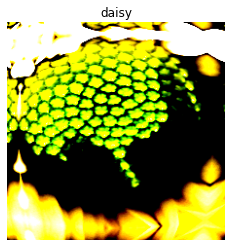

In [ ]:
def plot_image(image, label, label_encoder):
    title = [k for k, v in label_encoder.items() if v == label]
    title = title[0] if title else "Unknown"
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()
for i in range(1):
   plot_image(*train_dataset[0], train_dataset.label_encoder)

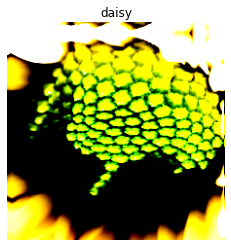

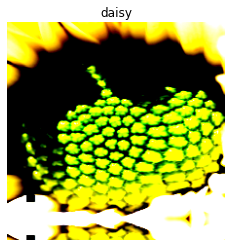

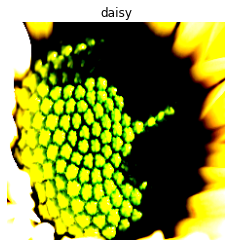

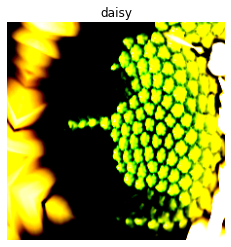

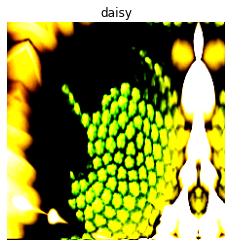

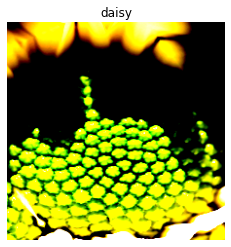

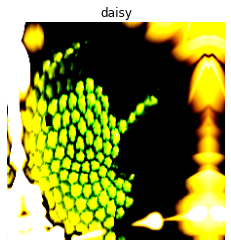

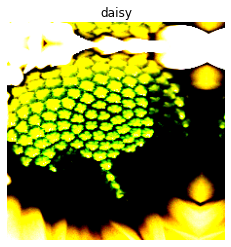

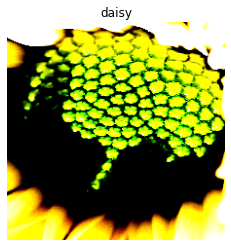

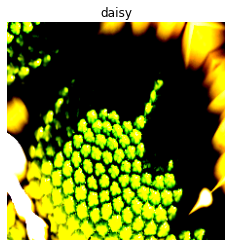

In [ ]:
for i in range(10):
    image, label = train_dataset.__getitem__(0)
    augmented = train_transform(image=image)
    image = augmented["image"]
    plot_image(*train_dataset[0], train_dataset.label_encoder)

It is not easy to distinguish between the transformed images. There could be several reasons why we cannot distinguish the transformed images:

1. The transformations are applied randomly, which means that the same image might look different when transformed multiple times. When we visualize the images a few times, we might not notice much difference between them because the same transformations might not be applied in the same order, or with the same parameters.

2. Low variation in the transformations: Some transformations might not produce noticeable differences if the parameters are set to small values. For example, a small change in brightness or contrast might not be noticeable.


To overcome these challenges, we could try applying the transformations with different parameters, or combining multiple transformations to create a larger variation in the transformed images. 

REFERENCES: 

https://github.com/albu/albumentations

 https://www.pyimagesearch.com/2019/07/08/paper-review-what-makes-good-data-augmentation/

# Neural Network
Abstract classes allow us to share functionality with any class that extends them. They also allow us to enforce subclasses to implement some functionality. We regularly extend different classes for these purposes. Note that you cannot instantiate an object using an abstract class.

#### 5. Below we define *Module* as an abstract class. For this assignment, any class that implements *Module* should implement a **forward** and a **backward** method.
- **forward**: The forward method should calculate the output given an input
- **backward**: The backward method should calculate the gradient during the backward pass 

We want you to complete the implementation for two modules:
1. Linear: Representing a fully connected layer without any nonlinearity
2. Sigmoid: Representing the sigmoid function that we implemented during the lectures

In forward and backward methods of the **Linear** and **Sigmoid** modules, there are some TODO items that you need to complete. Note that you need to keep the *Module* class unchanged. (35 points)

In [ ]:
# Keep unchanged
class Module(ABC):
    def __init__(self):
        self.num_forward_without_backward = 0
    
    @abstractmethod
    def forward(self, x):
        pass
    
    @abstractmethod
    def backward(self, du):
        pass
    
    def backward_check(self,):
        if self.num_forward_without_backward < 1:
            raise  RuntimeError(
                '''Backward was requested before a forward pass (or multiple times).
            Remember in the backward pass, the gradient of the forward operation is
            calculated. Therefore, backward should happen after forward.'''
            )
            
        elif self.num_forward_without_backward > 1:
            raise  RuntimeError(
                '''Backward was requested after several forward passes.
            In this assignment, modules have a cache variable that helps them
            to calculate the gradient of the last forward pass. They can not 
            handle backward pass of multiple forward passes.
            To solve this issue, instead of calling the forward pass
            an instance, for example sigmoid, several times, create mutiple instances
            and call the forward once for each one of them.'''
                               )
        else:
            return True

To implement the weights matrix and bias in the __init__ method, you can create numpy arrays and initialize them randomly with small values using np.random.randn. The shape of the weight matrix should be (output_dim, input_dim) and the shape of the bias should be (output_dim,).

The forward method should perform the dot product between the input x and the weight matrix, add the bias and return the result.

The backward method should calculate the gradient of the loss with respect to the inputs x and the parameters (weights and bias). It should update the gradients dweight and dbias with the computed gradients and return the gradient with respect to the input x (dx).

## Linear Class (Layer With Trainable Parameters)

In [ ]:
class Linear(Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.cache = None
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        # Create the weights matrix (parameters) and bias
        self.weight = np.random.randn(output_dim, input_dim) * 0.01
        self.bias = np.zeros(output_dim)
        
        self.dweight = np.empty_like(self.weight)
        self.dbias = np.empty_like(self.bias)
        self.parameters_dict = {'weight':('weight', 'dweight'),
                                'bias':('bias', 'dbias')}
                            
    def forward(self, x):
        self.num_forward_without_backward += 1
        
        # Implement the forward method for the Linear Module
        self.cache = x
        out = np.dot( self.weight, x) + self.bias
        
        
        return out

    def backward(self, du):
        self.backward_check()
        self.num_forward_without_backward -= 1

        # Implement the backward method for the Linear Module
        # x, weight, bias = self.cache
        # dx = np.dot(weight.T, du)
        # dx = np.dot(weight.T, du)
        # dx = np.dot(weight.T, du)
        dw = np.dot(self.cache.T, du)
        db = np.dot(np.ones_like(self.cache), du)


        # dx = np.dot(weight.T, du)

        # # dx = np.dot(weight, du.T)

        # # dx = np.dot(du, weight)
        # self.dweight = np.dot(du[:, None], x[None, :])
        # self.dweight = np.dot(du.T, x)
        # self.dbias = np.sum(du, axis=1)
        
        return dw, db

## Sigmoid (Activation Function)

https://www.digitalocean.com/community/tutorials/sigmoid-activation-function-python

In [ ]:
class Sigmoid(Module):
    def __init__(self):
        super().__init__()
        self.cache = None
        
    def forward(self, x):
        self.num_forward_without_backward += 1
        self.cache = 1 / (1 + np.exp(-x))
        return self.cache
        
    def backward(self, du):
        self.backward_check()
        self.num_forward_without_backward -= 1
        dsigmoid = self.cache * (1 - self.cache)
        dx = du * dsigmoid
        return dx


Write some test cases to show that your code is working as it should.

# For Sigmoid

In [ ]:
import math

sigmoid = Sigmoid()

x = 0
result = sigmoid.forward(x)
print("Sigmoid of", x, "is", result)

x = 1
result = sigmoid.forward(x)
print("Sigmoid of", x, "is", result)

x = -1
result = sigmoid.forward(x)
print("Sigmoid of", x, "is", result)

print("Expected output for sigmoid of 0 is 0.5, for sigmoid of 1 is", 1 / (1 + math.exp(-1)), "and for sigmoid of -1 is", 1 / (1 + math.exp(1)))



Sigmoid of 0 is 0.5
Sigmoid of 1 is 0.7310585786300049
Sigmoid of -1 is 0.2689414213699951
Expected output for sigmoid of 0 is 0.5, for sigmoid of 1 is 0.7310585786300049 and for sigmoid of -1 is 0.2689414213699951


In [ ]:

x = np.array([-1, 0, 1])
y = sigmoid.forward(x)

print(y)

[0.268941 0.5      0.731059]


In [ ]:
import numpy as np

# Test case 1: Check if forward() returns the correct output
x = np.array([[1, 2], [3, 4]])
sigmoid = Sigmoid()
output = sigmoid.forward(x)
expected_output = 1 / (1 + np.exp(-x))
assert np.allclose(output, expected_output), f"Expected {expected_output}, but got {output}"
print(expected_output)



[[0.731059 0.880797]
 [0.952574 0.982014]]


In [ ]:
# Test case 2: Check if backward() returns the correct output
du = np.array([[0.1, 0.2], [0.3, 0.4]])
dx = sigmoid.backward(du)
expected_dx = du * sigmoid.cache * (1 - sigmoid.cache)
assert np.allclose(dx, expected_dx), f"Expected {expected_dx}, but got {dx}"
print(expected_dx)


[[0.019661 0.020999]
 [0.013553 0.007065]]


if we call sigmoid backward without forward it will return error because Backward was requested before a forward pass.

In [ ]:
# test to see backward doesnt work without forward
du = np.array([[0.1, 0.2], [0.3, 0.4]])
dx = sigmoid.backward(du)
expected_dx = du * sigmoid.cache * (1 - sigmoid.cache)
assert np.allclose(dx, expected_dx), f"Expected {expected_dx}, but got {dx}"
print(expected_dx)



RuntimeError: ignored

In [ ]:
# Test case 3: Check if the number of forward() calls without backward() is correctly maintained
sigmoid = Sigmoid()
x = np.array([[1, 2], [3, 4]])
sigmoid.forward(x)
assert sigmoid.num_forward_without_backward == 1, f"Expected 1, but got {sigmoid.num_forward_without_backward}"
sigmoid.backward(du)
assert sigmoid.num_forward_without_backward == 0, f"Expected 0, but got {sigmoid.num_forward_without_backward}"

More tests on linear

In [ ]:
# Test for correct output shape:

input_dim = 5
output_dim = 4
linear = Linear(input_dim, output_dim)
x = np.random.randn(10, input_dim)
out = linear.forward(x)
assert out.shape == (10, output_dim), f"Expected output shape ({10, output_dim}), got {out.shape}"



In [ ]:
# Test for correct weight and bias initialization
input_dim = 5
output_dim = 4
linear = Linear(input_dim, output_dim)
assert linear.weight.shape == (output_dim, input_dim), f"Expected weight shape ({output_dim, input_dim}), got {linear.weight.shape}"
assert linear.bias.shape == (output_dim,), f"Expected bias shape ({output_dim,}), got {linear.bias.shape}"


In [ ]:
#Test for correctness of the forward computation
input_dim = 5
output_dim = 4
linear = Linear(input_dim, output_dim)
x = np.random.randn(10, input_dim)
out = linear.forward(x)
expected_out = np.dot(x, linear.weight.T) + linear.bias
assert np.allclose(out, expected_out), f"Expected output {expected_out}, got {out}"


In [ ]:
import numpy as np

X = np.array([[1., 2., 3.]])

mdl = Sigmoid()
prd = mdl.forward(X.reshape(-1))

print(prd)
du = np.ones(3)
dx = mdl.backward(du)
print("Sigmoid Gradient: ", dx)


[0.731059 0.880797 0.952574]
Sigmoid Gradient:  [0.196612 0.104994 0.045177]


# A complete example

In [ ]:
import torch 
from torch import nn, optim
model = nn.Sequential(nn.Linear(3, 2, bias = True))

X = torch.tensor([[1., 2., 3.]])
y = torch.tensor([[3., 5.]])

pred = model(X)
external_grad = torch.ones(1, 2)
pred.backward(gradient = external_grad)

mdl = Linear(3, 2)
prd = mdl.forward(X.reshape(-1))

print(pred)
du = np.ones(3)
w, b = mdl.backward(du)
print("Weight Gradient: ", w)
print("Bias Gradient: ", b)

tensor([[-0.4566,  2.4417]], grad_fn=<AddmmBackward0>)
Weight Gradient:  6.0
Bias Gradient:  3.0
